# Assignment 1

In [ ]:
!pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import train_test_split
import os
import mat4py as mt
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML/'

Mounted at /content/gdrive


### OpenFile function defined to open the  files and convert the data to the pandas dataframe
New training and testing data will be saved "new_train.ext" and "new_test.ext" files respectively (ext = extension)

BT19ECE036_dataset_div_shuffle(filepath, ratio, strY, *strX):
### filepath, train ratio, dependent variables, independent variables

In [ ]:
def openFile(filepath):
  data = None
  with open(filepath, 'r') as fp:
    extension = filepath.split(".")[-1]
  if (extension == 'xlsx'):
    data = pd.read_excel(filepath)
  elif (extension == 'csv'):
    data = pd.read_csv(filepath)
  elif (extension == 'mat'):
    datamat = mt.loadmat(filepath)
    data = pd.DataFrame.from_dict(datamat)
  else:
    print("File not found!")
    return None
  return [data, extension]

def BT19ECE036_dataset_div_shuffle(filepath, ratio, strY, strX):
  data, extension = openFile(filepath)
  data.columns = data.columns.str.strip()
  dataX = data.filter(strX)
  dataY = data.filter(strY)
  x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size = ratio, shuffle=True)
  saveFile(x_train, x_test, y_train, y_test, extension)
  return data

def saveFile(x_train, x_test, y_train, y_test, extension):
  if (extension == 'csv'):
    x_train.to_csv("x_train.csv")
    x_test.to_csv("x_test.csv")
    y_train.to_csv("y_train.csv")
    y_test.to_csv("y_test.csv")
  elif (extension == 'xlsx'):
    x_train.to_excel("x_train.xlsx")
    x_test.to_excel("x_test.xlsx")
    y_train.to_excel("y_train.xlsx")
    y_test.to_excel("y_test.xlsx")
  elif (extension == 'mat'):
    sio.savemat("x_train.mat", x_train)
    sio.savemat("x_test.mat", x_test)
    sio.savemat("y_train.mat", y_train)
    sio.savemat("y_test.mat", y_test)
  else:
    print("Unable to save file")

### Dividing original dataset into training and testing datasets with a split ration of 0.75

In [ ]:
filepath = root_path + 'train.csv'
print(filepath)
dataLoad = pd.read_csv(filepath)
data = BT19ECE036_dataset_div_shuffle(filepath, 0.75, dataLoad.columns[3], dataLoad.columns[2])
data

gdrive/My Drive/ML/train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Assignment 2

In [ ]:
filepath = root_path + 'Matlab_accidents.mat'
dataLoad = mt.loadmat(filepath)
datamat = dataLoad['accidents']
data = pd.DataFrame(datamat['hwydata'], columns = datamat['hwyheaders'])
states = [x[0] for x in datamat["statelabel"]]
data.insert(loc = 0,column = 'States',value = states)
filepath = "new_accidents.csv"
data.to_csv(filepath)
data

,States,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
0,Wyoming,56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
1,District of Columbia,11.0,-77.026928,38.892064,43.0,349.122,240.403,3742.0,15565.529548,12.316611,17.886632,1.149118,12.0,27.906977,572059.0,572059.0,0.0,100.000000
2,Vermont,50.0,-72.556496,44.043498,98.0,550.462,551.516,7855.0,14242.560506,17.803227,17.769203,1.247613,20.0,20.408163,608827.0,232550.0,376277.0,38.196401
3,Alaska,2.0,-152.459342,64.609656,101.0,482.532,681.115,4990.0,7326.222444,20.931254,14.828627,2.024048,30.0,29.702970,626932.0,411955.0,214977.0,65.709678
4,North Dakota,38.0,-99.499793,47.469117,100.0,461.780,721.835,7594.0,10520.409789,21.655334,13.853581,1.316829,35.0,35.000000,642200.0,358394.0,283806.0,55.807225
5,South Dakota,46.0,-99.678970,44.272030,197.0,563.298,882.769,8784.0,9950.508004,34.972608,22.316144,2.242714,76.0,38.578680,754844.0,391936.0,362908.0,51.922781
6,Delaware,10.0,-75.494156,39.107074,134.0,533.943,728.524,9301.0,12766.909532,25.096312,18.393354,1.440705,48.0,35.820896,783600.0,627045.0,156555.0,80.021057
7,Montana,30.0,-110.576261,46.867085,229.0,712.880,1056.668,11207.0,10605.980308,32.123218,21.671897,2.043366,100.0,43.668122,902195.0,487465.0,414730.0,54.031002
8,Rhode Island,44.0,-71.433651,41.588663,83.0,741.841,834.501,8473.0,10153.373094,11.188381,9.946064,0.979582,41.0,49.397590,1048319.0,953295.0,95024.0,90.935584
9,Hawaii,15.0,-154.525892,21.045779,142.0,843.876,970.518,9725.0,10020.422084,16.827117,14.631362,1.460154,52.0,36.619718,1211537.0,1109179.0,102358.0,91.551393


### Using function defined in experiment 1 to perform train test split for new matlab data file. 

In [ ]:
independent = ['Licensed drivers (thousands)', 'Registered vehicles (thousands)', 'Vehicle-miles traveled (millions)']
dependent = ['Miles traveled per vehicle']
data = BT19ECE036_dataset_div_shuffle(filepath, 0.7, dependent, independent)
data

,Unnamed: 0,States,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
0,0,Wyoming,56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
1,1,District of Columbia,11.0,-77.026928,38.892064,43.0,349.122,240.403,3742.0,15565.529548,12.316611,17.886632,1.149118,12.0,27.906977,572059.0,572059.0,0.0,100.000000
2,2,Vermont,50.0,-72.556496,44.043498,98.0,550.462,551.516,7855.0,14242.560506,17.803227,17.769203,1.247613,20.0,20.408163,608827.0,232550.0,376277.0,38.196401
3,3,Alaska,2.0,-152.459342,64.609656,101.0,482.532,681.115,4990.0,7326.222444,20.931254,14.828627,2.024048,30.0,29.702970,626932.0,411955.0,214977.0,65.709678
4,4,North Dakota,38.0,-99.499793,47.469117,100.0,461.780,721.835,7594.0,10520.409789,21.655334,13.853581,1.316829,35.0,35.000000,642200.0,358394.0,283806.0,55.807225
5,5,South Dakota,46.0,-99.678970,44.272030,197.0,563.298,882.769,8784.0,9950.508004,34.972608,22.316144,2.242714,76.0,38.578680,754844.0,391936.0,362908.0,51.922781
6,6,Delaware,10.0,-75.494156,39.107074,134.0,533.943,728.524,9301.0,12766.909532,25.096312,18.393354,1.440705,48.0,35.820896,783600.0,627045.0,156555.0,80.021057
7,7,Montana,30.0,-110.576261,46.867085,229.0,712.880,1056.668,11207.0,10605.980308,32.123218,21.671897,2.043366,100.0,43.668122,902195.0,487465.0,414730.0,54.031002
8,8,Rhode Island,44.0,-71.433651,41.588663,83.0,741.841,834.501,8473.0,10153.373094,11.188381,9.946064,0.979582,41.0,49.397590,1048319.0,953295.0,95024.0,90.935584
9,9,Hawaii,15.0,-154.525892,21.045779,142.0,843.876,970.518,9725.0,10020.422084,16.827117,14.631362,1.460154,52.0,36.619718,1211537.0,1109179.0,102358.0,91.551393


### Normalising train and test data and removing unamed column which was a result of storing and retrieving data from new files, index got converted into unnamed column

In [ ]:
def newData(filepath):
  data, extension = openFile(filepath)

  for column in data:
    data[column] = data[column]/np.amax(data[column])
  return data
dataXTrain = newData('x_train.csv')
dataYTrain = newData('y_train.csv')
dataYTest = newData('y_test.csv')
dataXTest = newData('x_test.csv')
dataXTrain.drop(dataXTrain.columns[0], axis = 1, inplace = True)
dataYTrain.drop(dataYTrain.columns[0], axis = 1, inplace = True)
dataXTest.drop(dataXTest.columns[0], axis = 1, inplace = True)
dataYTest.drop(dataYTest.columns[0], axis = 1, inplace = True)

In [ ]:
dataYTrain

,Miles traveled per vehicle
0,0.606135
1,0.724995
2,0.493731
3,0.666041
4,0.539735
5,0.765742
6,0.649804
7,0.644853
8,0.579783
9,0.518749


### Training the model on training dataset and testing on X testing dataset. Then predicting on Y test dataset

In [ ]:
def theta(dataXTrain, dataYTrain, dataYTest, dataXTest):
  dataXtrain = np.array(dataXTrain)
  dataYtrain = np.array(dataYTrain)
  dataYTest = np.array(dataYTest)
  dataXTest = np.array(dataXTest)

  trainOnes = np.ones([dataXTrain.shape[0], 1])
  thetaTrain = np.hstack((trainOnes, dataXTrain))

  testOnes = np.ones([dataXTest.shape[0], 1])
  thetaTest = np.hstack((testOnes, dataXTest))

  return thetaTrain, thetaTest


def linregPseudoInverse(dataXTrain, dataYTrain, dataYTest, dataXTest):
  thetaTrain, thetaTest = theta(dataXTrain, dataYTrain, dataYTest, dataXTest)
  weightOpt = np.matmul(np.linalg.pinv(thetaTrain), dataYTrain)
  yPredict = np.matmul(thetaTest, weightOpt)
  return [dataYTest, yPredict] 

### Error Calculation

In [ ]:
def errors(x, y):
  print("Mean Squared Error: ", mean_squared_error(x, y))
  print("Root Mean Squared Error: ", mean_squared_error(x, y, squared = False))
  print("Mean Absolute Error: ", mean_absolute_error(x, y))

### Plotting the real value and predicted graphs recieved after training the model over the datasets.

Mean Squared Error:  0.012448938910651769
Root Mean Squared Error:  0.11157481306572631
Mean Absolute Error:  0.07956755619748061


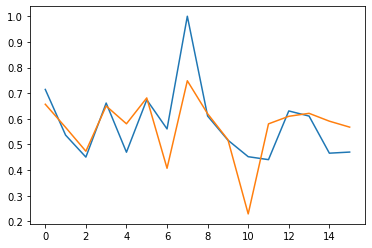

In [ ]:
x, y = linregPseudoInverse(dataXTrain, dataYTrain, dataYTest, dataXTest)
plt.plot(x)
plt.plot(y)
errors(x, y)

### Predicted in orange and Y-test in blue

## Finding optimum weights using Gradiend Descent

In [ ]:
def gradientDescent(iterations, learningRate, dataXTrain, dataYTrain, dataYTest, dataXTest):
  thetaTrain, thetaTest = theta(dataXTrain, dataYTrain, dataYTest, dataXTest)
  gradWieght = np.random.randn(len(thetaTrain[0]), 1)
  
  for i in range(iterations):
    deltaE = np.matmul(thetaTrain.transpose(), (np.matmul(thetaTrain, gradWieght) - dataYTrain))
    gradWieght = gradWieght - learningRate * deltaE 
  yGradientPrediction = np.matmul(thetaTest, gradWieght)
  return dataYTest, yGradientPrediction

### Plotting Y-test and predicted values and calculating the error ratio

Mean Squared Error:  0.013830628089381665
Root Mean Squared Error:  0.11760369079829792
Mean Absolute Error:  0.08763358646690608


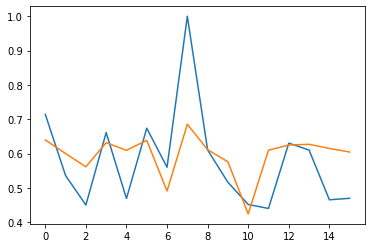

In [ ]:
x, y = gradientDescent(1000, 0.02, dataXTrain, dataYTrain, dataYTest, dataXTest)
plt.plot(x)
plt.plot(y)
errors(x, y)

### Predicted in orange and Y-test in blue

## Changing relationship between input and output variables

### Recalculating Theta matrix

In [ ]:
trainOnes = np.ones([dataXTrain.shape[0], 1])

trainSquare = np.square(dataXTrain.T.iloc[0]).values.reshape(dataXTrain.shape[0], 1)
thetaTrain = np.hstack((trainOnes, trainSquare, dataXTrain))
# thetaTrain = np.hstack((trainOnes, np.reshape(np.square(dataXTrain.T.iloc[0]).T, (dataXTrain.shape[0], 1)), dataXTrain))
# thetaTest = np.hstack((testOnes, np.reshape(np.square(dataXTest.T[0]).T, (dataXTest.shape[0], 1)), dataXTest))
testOnes = np.ones([dataXTest.shape[0], 1])
trainSquare = np.square(dataXTest.T.iloc[0]).values.reshape(dataXTest.shape[0], 1)
thetaTest = np.hstack((testOnes, trainSquare, dataXTest))

### Calculate Gradient Wieght and using Pseudo Inverse

In [ ]:
gradWieght = np.matmul(np.linalg.pinv(thetaTrain), dataYTrain)
yPrediction = np.matmul(thetaTest, gradWieght)

Mean Squared Error:  0.021369156437038475
Root Mean Squared Error:  0.14618192924242884
Mean Absolute Error:  0.10077519253707812


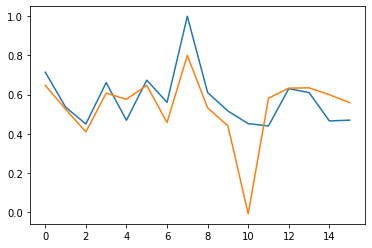

In [ ]:
x = dataYTest
y = yPrediction
plt.plot(x)
plt.plot(y)
errors(x, y)

# Assignment 3

In [ ]:
data = mt.loadmat(root_path + "Matlab_cancer.mat")

In [ ]:
import math
dataX = data['x']
dataY = data['t']
tr = np.transpose(np.vstack([dataY, dataX]))
np.random.shuffle(tr)
trnspose = np.transpose(tr)
dataY = trnspose[0, : ]
dataX = trnspose[2 : , : ]
splitRatio = 0.7
p = math.ceil(dataX.shape[1] * splitRatio)
print("training dataset:-", p)
dataXTrain = dataX[:, : p // 2]
dataYTrain = dataY[ : p // 2]
dataXTest = dataX[ : , p : ]
dataYTest = dataY[p:]
val_x = dataX[ : , p // 2 : p]
val_y = dataY[p // 2 : p]
np.count_nonzero(dataXTrain)

training dataset:- 152


7600

In [ ]:
class NeuralNetwork(): 
    def __init__(self, model, learningRate): 
        self.architecture = model
        self.neuralLayers = len(model)
        self.learningRate = learningRate
        self.dw = []
        self.db = []
        self.bias = []
        self.weight = []
        self.cost = []
        self.accuracyTest = []
        self.accuracyTrain = []
        self.accuracyValidation = []
        
        for i, j in zip(model[1 : ], model[ : -1]): 
            w = np.random.randn(i, j) 
            b = np.random.randn(i, 1) 
            dw = np.zeros([i, j])
            db = np.zeros([i, 1])
            self.dw.append(dw)
            self.db.append(db)
            self.weight.append(w)
            self.bias.append(b)
        self.activation = []
        for i in model: 
            a = np.zeros(i)
            self.activation.append(a)

    def sigmoid(self, z): 
        activation = 1 / (1 + np.exp(-z))
        return activation

    def costFunction(self, Y): 
        L = (Y * np.log(self.activation[-1]) + (1 - Y) * np.log(1 - self.activation[-1]))
        L = -L
        J = np.sum(L) / Y.shape[0]
        self.cost.append(J)

    def forwardPropagation(self, ip): 
        activation = ip
        self.activation[0] = activation
        saveNum = list(range(1, self.neuralLayers))
        for i, w, b in zip(saveNum, self.weight, self.bias): 
            z = np.matmul(w, activation) + b
            activation = self.sigmoid(z) 
            self.activation[i] = activation 
    
    def backwardPropagation(self, batchSize, Y): 
        dz = self.activation[-1] - Y
        dw = np.matmul(dz, self.activation[-2].T) / batchSize
        db = np.sum(dz, axis = 1) / batchSize
        self.dw[-1] = dw
        self.db[-1] = db.reshape([-1, 1])
        for i in range(2, self.neuralLayers):        
            sis = self.activation[-i] * (1 - self.activation[-i])
            dz = np.matmul(self.weight[-i + 1].T, dz) 
            dz = dz * sis      
            dw = np.matmul(dz, self.activation[-i - 1].T) / batchSize
            db = np.sum(dz, axis=1) / batchSize
            self.dw[-i] = dw
            self.db[-i] = db.reshape([-1, 1])
            self.costFunction(Y)

    def gradientDescent(self): 
        for i in range(self.neuralLayers - 1): 
            self.weight[i] = self.weight[i] - self.learningRate * self.dw[i]
            self.bias[i] = self.bias[i] - self.learningRate * self.db[i]

    def accuracy(self, ip, op, threshold = 0.5, confusion = False): 
        activation = ip
        saveN = list(range(1, self.neuralLayers))
        accuracy = 0
        for i, w, b in zip(saveN, self.weight, self.bias):
          z = np.matmul(w, activation) + b   
          activation = self.sigmoid(z)  
        activation = activation.reshape(-1, )
        activation[activation > threshold] = 1
        activation[activation <= threshold] = 0
        if confusion == True: 
            return activation
        for i, j in enumerate(activation): 
            if j == op[i]: 
                accuracy = accuracy+1
        return accuracy / ip.shape[1]

    def confusionMatrix(self, ip, op, thresholdList): 
        T_p = []
        T_n = []
        F_p = []
        F_n = []
        for i in thresholdList: 
            activation = self.accuracy(ip, op, i, True)
            c = activation - 2 * op
            T_p.append(np.count_nonzero(c == -1))
            T_n.append(np.count_nonzero(c == 0))
            F_p.append(np.count_nonzero(c == 1))
            F_n.append(np.count_nonzero(c == -2))
        return T_p, T_n, F_p, F_n

    def trainFunction(self, ip, op, epochs,  validationSet = None): 
        batchSize = ip.shape[1]
        for i in range(epochs): 
            self.forwardPropagation(ip)
            self.backwardPropagation(batchSize, op)
            self.gradientDescent()
            accTrain = self.accuracy(ip, op)
            print('Accuracy = ',  accTrain * 100, '%')
            self.accuracyTrain.append( accTrain)
            if validationSet != None: 
                accTest = self.accuracy( validationSet[0],  validationSet[1])
                self.accuracyTest.append( accTest )



In [ ]:
annObject = NeuralNetwork([100, 32, 1], 3e-2)

In [ ]:
thresholdList = np.arange(0, 1, 0.001)
T_p, T_n, F_p, F_n = annObject.confusionMatrix(dataXTrain, dataYTrain, thresholdList)
T_p = np.array(T_p)
T_n = np.array(T_n)
F_p = np.array(F_p)
F_n = np.array(F_n)

### Without validation

In [ ]:
annObject.neuralLayers
annObject.trainFunction(dataXTrain, dataYTrain, 600)

Accuracy =  15.789473684210526 %
Accuracy =  15.789473684210526 %
Accuracy =  15.789473684210526 %
Accuracy =  15.789473684210526 %
Accuracy =  17.105263157894736 %
Accuracy =  18.421052631578945 %
Accuracy =  18.421052631578945 %
Accuracy =  19.736842105263158 %
Accuracy =  21.052631578947366 %
Accuracy =  23.684210526315788 %
Accuracy =  27.631578947368425 %
Accuracy =  28.947368421052634 %
Accuracy =  38.15789473684211 %
Accuracy =  42.10526315789473 %
Accuracy =  48.68421052631579 %
Accuracy =  56.57894736842105 %
Accuracy =  61.8421052631579 %
Accuracy =  63.1578947368421 %
Accuracy =  63.1578947368421 %
Accuracy =  65.78947368421053 %
Accuracy =  69.73684210526315 %
Accuracy =  73.68421052631578 %
Accuracy =  76.31578947368422 %
Accuracy =  80.26315789473685 %
Accuracy =  80.26315789473685 %
Accuracy =  81.57894736842105 %
Accuracy =  81.57894736842105 %
Accuracy =  82.89473684210526 %
Accuracy =  82.89473684210526 %
Accuracy =  84.21052631578947 %
Accuracy =  85.52631578947368 %

# ###With validation

In [ ]:
annObject.trainFunction(dataXTrain, dataYTrain, 600, [val_x, val_y])

Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy =  89.47368421052632 %
Accuracy

###*Specificity - speci*
###*Sensitivity - sensi*

In [ ]:
speci = T_n/(F_p+T_n)
sensi = T_p/(T_p+F_n)
f_r = 1 - speci

In [ ]:
print(speci)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.0333333

In [ ]:
print(sensi)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.97826087 0.97826087 0.97826087 0.97826087 0.97826087 0.91304348
 0.89130435 0.89130435 0.89130435 0.89130435 0.89130435 0.89130435
 0.89130435 0.86956522 0.86956522 0.86956522 0.86956522 0.86956522
 0.86956522 0.84782609 0.84782609 0.84782609 0.84782609 0.84782609
 0.82608696 0.82608696 0.80434783 0.7826087  0.7826087  0.7826087
 0.7826087  0.7826087  0.76086957 0.7173913  0.67391304 0.67391304
 0.67391304 0.67391304 0.65217391 0.63043478 0.63043478 0.63043478
 0.60869565 0.58695652 0.58695652 0.58695652 0.58695652 0.58695652
 0.58695652 0.58695652 0.58695652 0.54347826 0.54347826 0.54347826
 0.54347826 0.54347826 0.54347826 0.52173913 0.52173913 0.5
 0.47826087 0.45652174 0.43478261 0.41304348 0.39130435 0.36956522
 0.36956522 0.36956522 0.36956522 0.36956522 0.36956522 0.34782609
 0.34782609 0.32608696 0.30

46 0 30 0


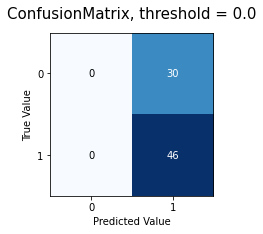

46 18 12 0


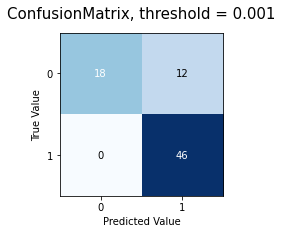

45 26 4 1


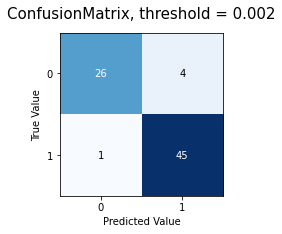

44 27 3 2


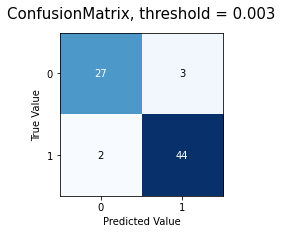

43 27 3 3


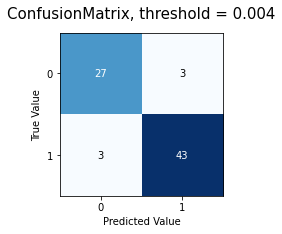

42 28 2 4


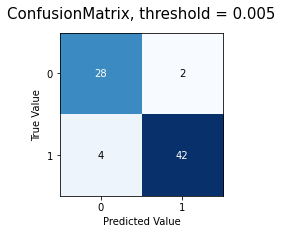

40 29 1 6


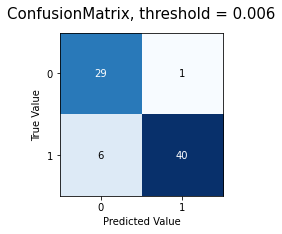

40 29 1 6


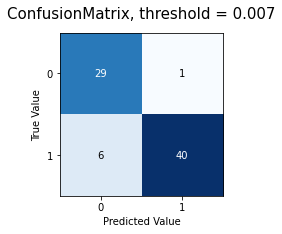

40 30 0 6


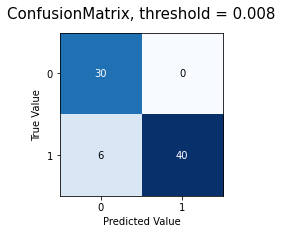

40 30 0 6


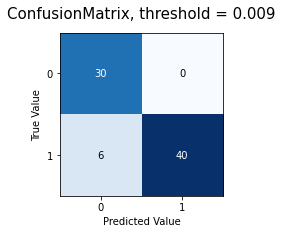

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
thresholdA = np.arange(0, 1, 0.1)
Tp,Tn,Fp,Fn = annObject.confusionMatrix(dataXTrain, dataYTrain, thresholdA)
Tp = np.array(Tp)
Tn = np.array(Tn)
Fp = np.array(Fp)
Fn = np.array(Fn)
for i, j, k, l, thresholdValue in zip(Tp, Tn, Fp, Fn, thresholdList):
    print(i, j, k, l)
    confusionMatrix = np.array([[j, k], [l, i]])
    fig, ax = plot_confusion_matrix(conf_mat = confusionMatrix, figsize = (3, 3), cmap = plt.cm.Blues)
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('ConfusionMatrix, threshold = {}'.format(round(thresholdValue, 3)), fontsize = 15)
    plt.show()

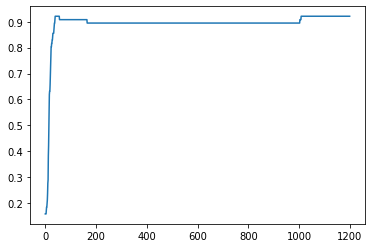

In [ ]:
plt.plot(annObject.accuracyTrain)

In [ ]:
annObject.accuracy(dataXTest, dataYTest)

0.828125